# Kaggle
## House Prices - Advanced Regression Techniques
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Josiel1998/machine-learning/main/Datasets/Kaggle/HousePrices/train.csv")
df.shape

(1460, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#df_encoded = df.apply(preprocessing.LabelEncoder().fit_transform)
#df_encoded.to_csv('../Datasets/Kaggle/HousePrices/demo.csv')

In [5]:
# Putting feature variable to X
X_interim = df.drop('SalePrice',axis=1)
X = X_interim.apply(preprocessing.LabelEncoder().fit_transform)
# Putting response variable to y
y = df['SalePrice']

In [6]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((1021, 80), (439, 80))

In [9]:
classifier_rf = RandomForestClassifier(max_depth=2, random_state=0)

In [10]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 234 ms, sys: 13.1 ms, total: 247 ms
Wall time: 245 ms


RandomForestClassifier(max_depth=2, random_state=0)

# Hyperparameter Tuning

In [11]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [12]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [13]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


/Users/josieldelgadillo/opt/anaconda3/envs/Github-ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


CPU times: user 1.39 s, sys: 426 ms, total: 1.82 s
Wall time: 34.6 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [14]:
grid_search.best_score_

0.03330269607843137

In [15]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=50, n_estimators=50,
                       n_jobs=-1, random_state=42)

# Visualize

In [16]:
df['SalePriceSTR'] = df['SalePrice'].apply(str)

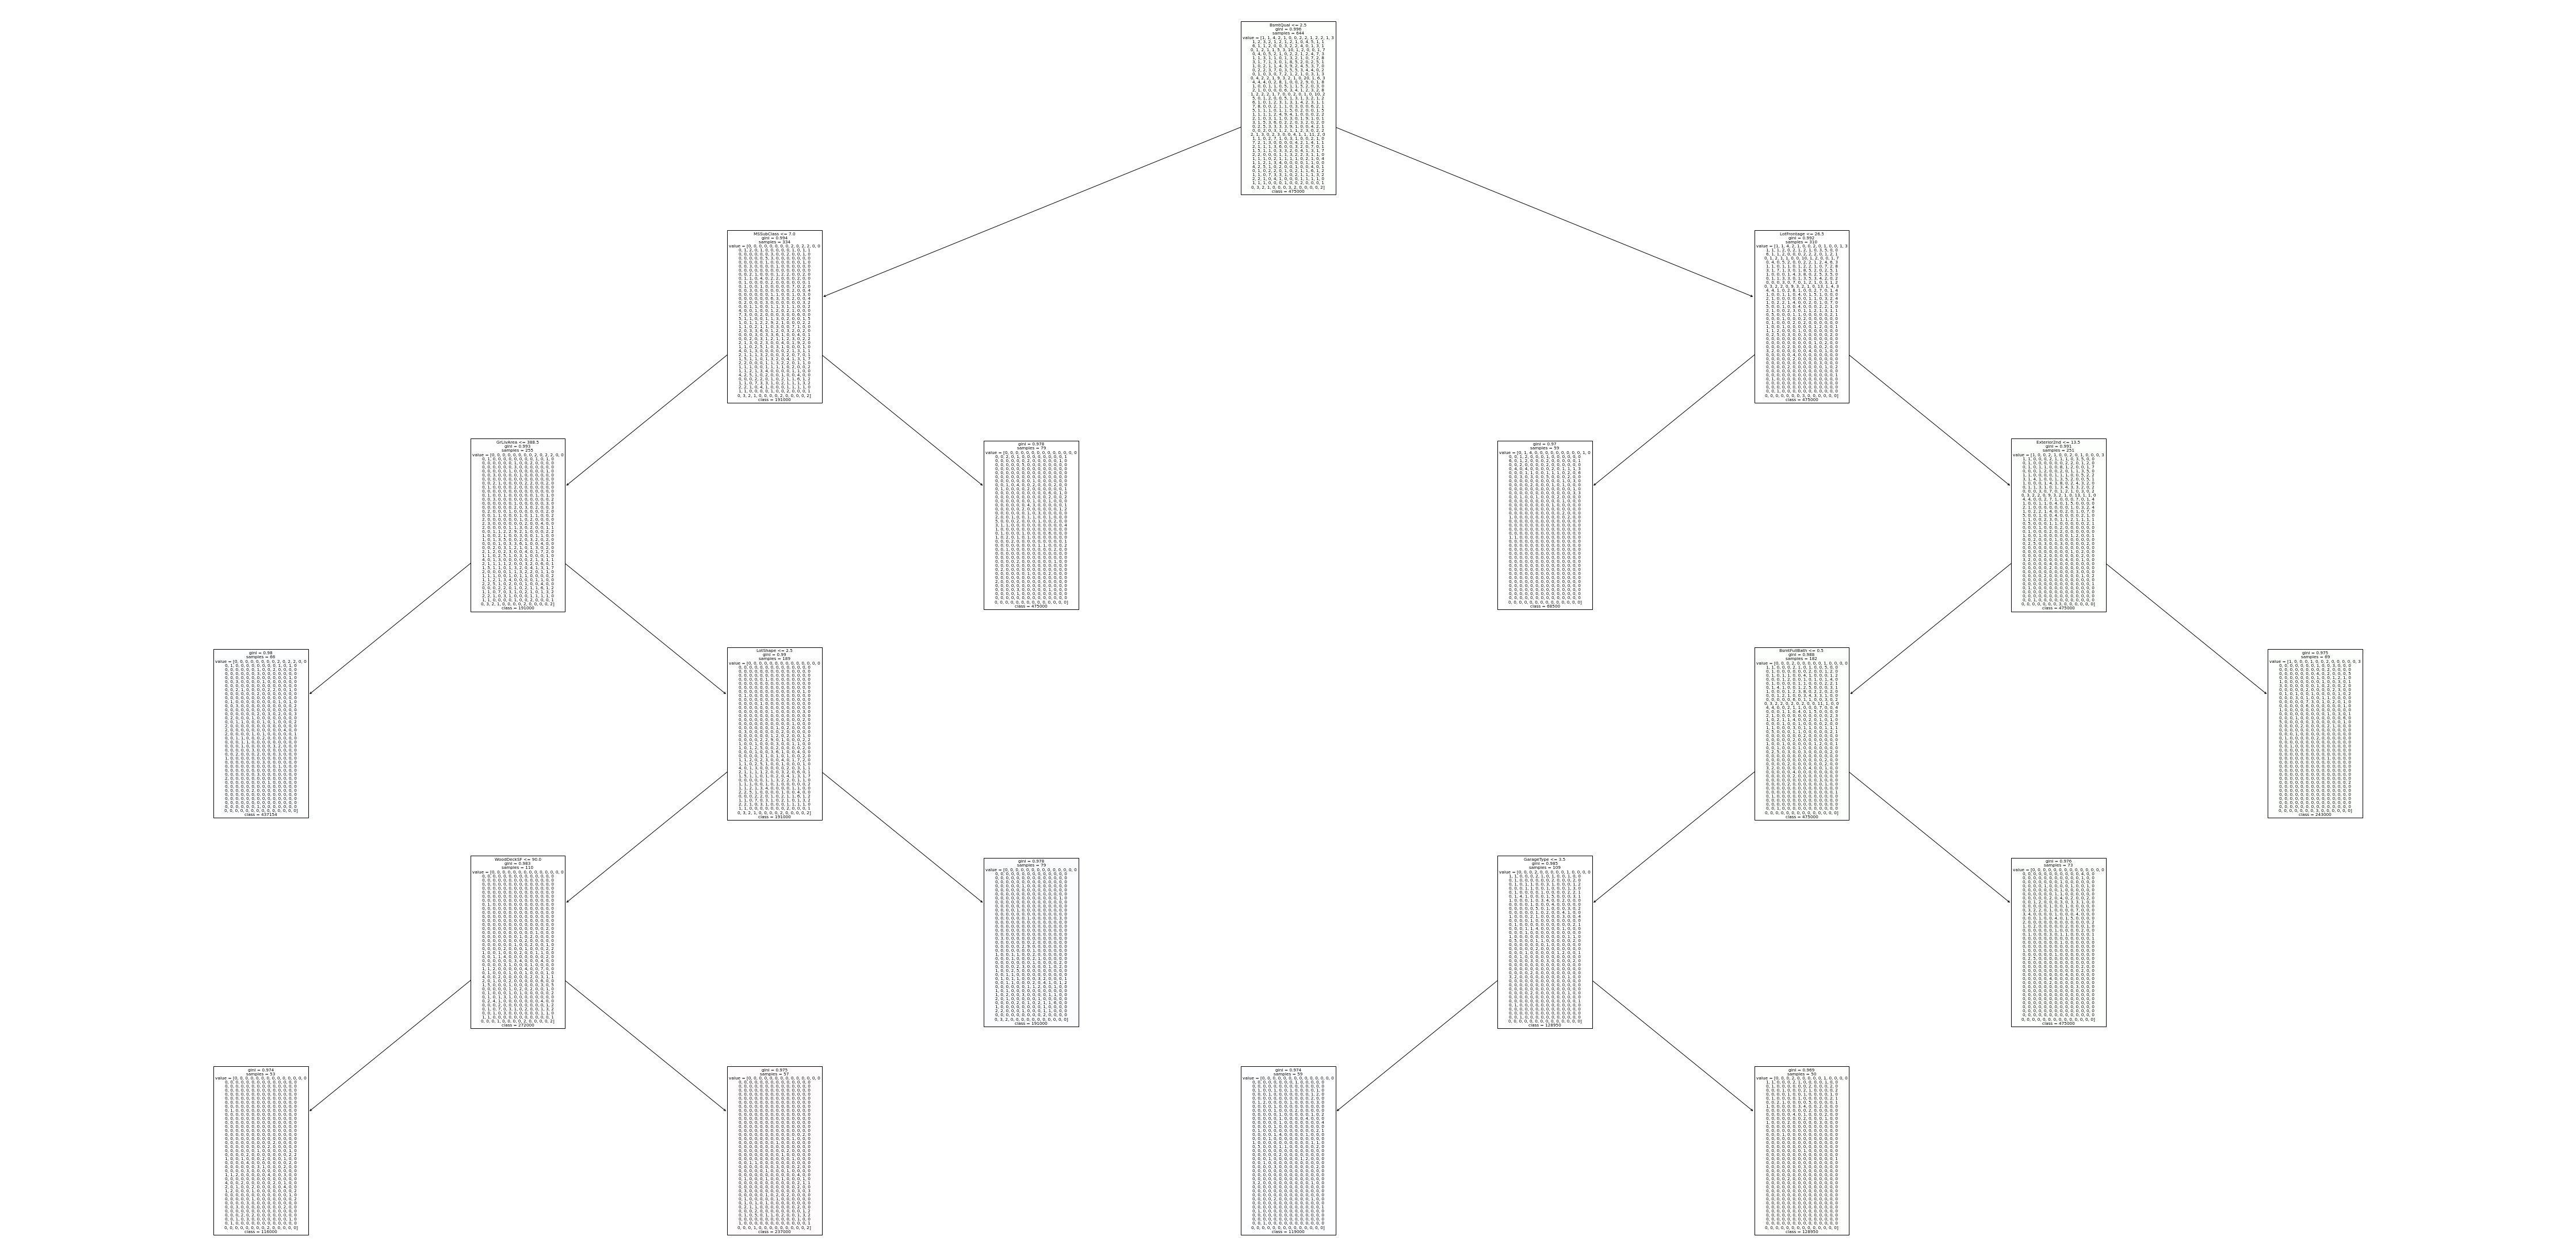

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=df['SalePriceSTR'].unique(),filled=True);

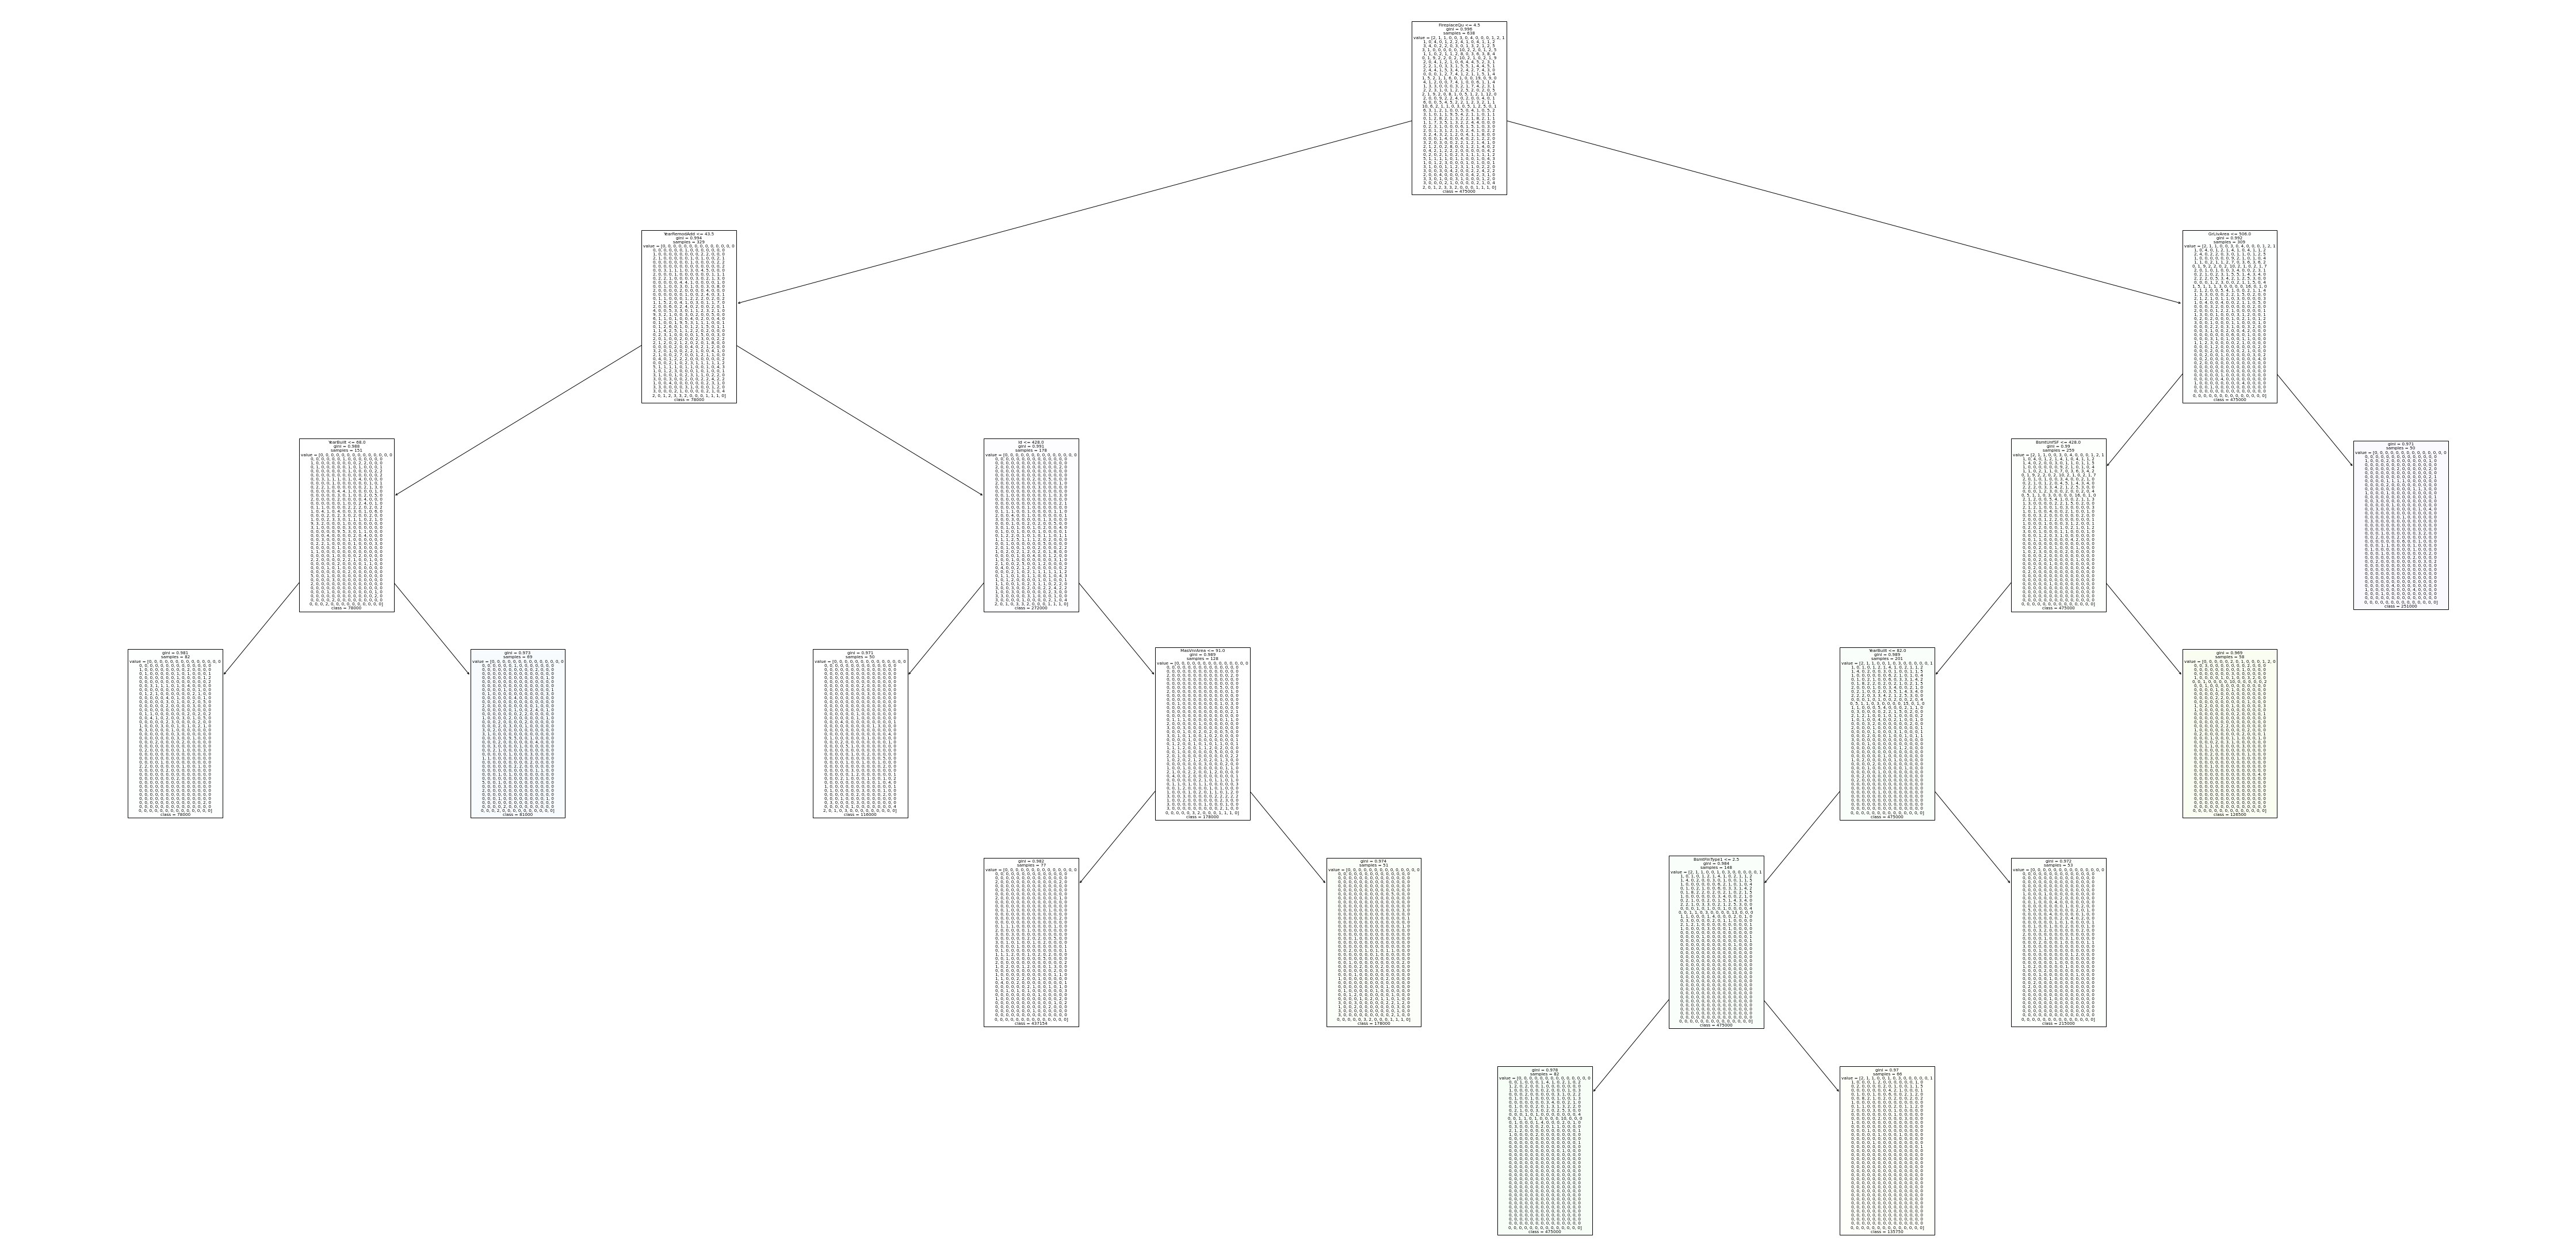

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=df['SalePriceSTR'].unique(),filled=True);

In [19]:
rf_best.feature_importances_

array([0.02776001, 0.01972452, 0.01512292, 0.02197456, 0.05272311,
       0.        , 0.        , 0.01516096, 0.        , 0.        ,
       0.01339957, 0.        , 0.01432392, 0.00273925, 0.        ,
       0.        , 0.01022682, 0.02802293, 0.00172852, 0.06038706,
       0.04815289, 0.0018548 , 0.        , 0.0070962 , 0.01097094,
       0.00255754, 0.01799906, 0.00994306, 0.        , 0.0071529 ,
       0.01536358, 0.        , 0.00404304, 0.01741466, 0.02991309,
       0.        , 0.0026633 , 0.02263362, 0.04346379, 0.        ,
       0.01430925, 0.        , 0.        , 0.0495171 , 0.02153726,
       0.        , 0.08374862, 0.00435518, 0.        , 0.0257821 ,
       0.00196794, 0.00563848, 0.        , 0.01606487, 0.0175982 ,
       0.        , 0.01811789, 0.01924853, 0.02224321, 0.02851512,
       0.01340323, 0.03077663, 0.04842908, 0.        , 0.        ,
       0.        , 0.02391179, 0.01093203, 0.00353147, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [21]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
46,GrLivArea,0.083749
19,YearBuilt,0.060387
4,LotArea,0.052723
43,1stFlrSF,0.049517
62,GarageArea,0.048429
...,...,...
14,Condition2,0.000000
31,BsmtCond,0.000000
11,LandSlope,0.000000
9,Utilities,0.000000


# Improvements

In [ ]:
# identify which columns are important features to evaluate
# visualize sales by different categories
# find correalations with a heatmap
# see density of features
